### CONTENTS

- Simple Linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/AP-State-Skill-Development-Corporation/Datasets/master/Data%20Analysis/Advertising.csv")
df.head()

Unnamed: 0     TV  radio  newspaper  sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [4]:
df.describe()

Unnamed: 0          TV       radio   newspaper       sales
count  200.000000  200.000000  200.000000  200.000000  200.000000
mean   100.500000  147.042500   23.264000   30.554000   14.022500
std     57.879185   85.854236   14.846809   21.778621    5.217457
min      1.000000    0.700000    0.000000    0.300000    1.600000
25%     50.750000   74.375000    9.975000   12.750000   10.375000
50%    100.500000  149.750000   22.900000   25.750000   12.900000
75%    150.250000  218.825000   36.525000   45.100000   17.400000
max    200.000000  296.400000   49.600000  114.000000   27.000000

In [5]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [6]:
df

TV  radio  newspaper  sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3    9.3
3    151.5   41.3       58.5   18.5
4    180.8   10.8       58.4   12.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1    9.7
197  177.0    9.3        6.4   12.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   13.4

[200 rows x 4 columns]

In [7]:
# collect the data

x = df['TV'].values
x.shape

(200,)

In [8]:
y = df['sales'].values
y.shape

(200,)

In [9]:
# calculate coefficient
# mean of x,y

In [10]:
mean_x = np.mean(x)
print(mean_x)
mean_y = np.mean(y)
print(mean_y)

147.0425
14.0225


In [11]:
# total no of values
n=len(x)
n

200

In [12]:
numer=0
denom=0
for i in range(n):
    numer += (x[i]-mean_x)*(y[i]-mean_y)
    denom += (x[i]-mean_x)**2
b1 = numer/denom
b0 = mean_y-(b1*mean_x)

In [13]:
print("The Linear Equation is y={:.4}x+{:.5}".format(b1,b0))

The Linear Equation is y=0.04754x+7.0326


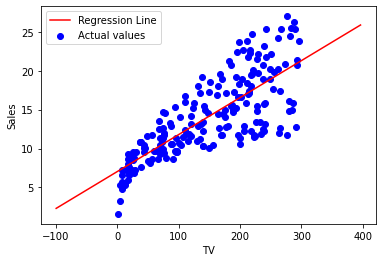

In [14]:
max_x=np.max(x)+100
min_x=np.min(x)-100
#print(max_x,min_x)
x1=np.linspace(min_x,max_x,1000)
y1=b0+b1*x1

plt.plot(x1,y1,color="red",label="Regression Line")
plt.scatter(x,y,c="Blue",label="Actual values")
plt.xlabel("TV")
plt.ylabel("Sales")
plt.legend(loc="best")
plt.show()

In [15]:
y_pred=b0+b1*x[2]
y_pred

7.8502237645756425

In [16]:
#Determination coefficient(R2)--(0 to 1)
ss_tot=0
ss_res=0
for i in range(n):
    y_pred=b0+b1*x[i]
    ss_res += (y[i]-y_pred)**2
    ss_tot += (y[i]-mean_y)**2
r2=1-(ss_res/ss_tot)
print(r2)

0.6118750508500708


In [18]:
### Using Sklearn
from sklearn.linear_model import LinearRegression
x=df["TV"].values.reshape(-1,1)
y=df["sales"].values.reshape(-1,1)
reg=LinearRegression()   #Aplying the data to the model
reg.fit(x,y)   

LinearRegression()

In [19]:
print(reg.coef_)

[[0.04753664]]


In [20]:
print(reg.intercept_)

[7.03259355]


In [21]:

reg.predict([[230.1]])

array([[17.97077451]])

In [22]:
pred=reg.predict(x)
pred

array([[17.97077451],
       [ 9.14797405],
       [ 7.85022376],
       [14.23439457],
       [15.62721814],
       [ 7.44616232],
       [ 9.76595037],
       [12.74649773],
       [ 7.44140866],
       [16.53041431],
       [10.17476548],
       [17.23871025],
       [ 8.16396559],
       [11.66741599],
       [16.73482186],
       [16.32125309],
       [10.25557777],
       [20.40940417],
       [10.32212907],
       [14.03474068],
       [17.41459582],
       [18.31779199],
       [ 7.6600772 ],
       [17.88520856],
       [ 9.99412625],
       [19.52997632],
       [13.82557947],
       [18.44614092],
       [18.85970969],
       [10.38868036],
       [20.95607553],
       [12.39948025],
       [11.653155  ],
       [19.65832525],
       [11.58185004],
       [20.85149492],
       [19.72012288],
       [10.58358059],
       [ 9.08142275],
       [17.87094757],
       [16.65876324],
       [15.44657891],
       [20.98935118],
       [16.86792445],
       [ 8.22576322],
       [15

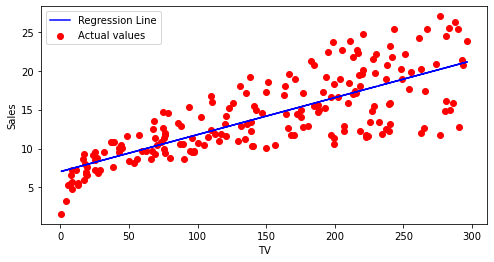

In [23]:
plt.figure(figsize=(8,4))
plt.scatter(df["TV"],df["sales"],c="red",label="Actual values")
plt.plot(df["TV"],pred,c="Blue",label="Regression Line")
plt.xlabel("TV")
plt.ylabel("Sales")
plt.legend(loc="best")
plt.show()

In [24]:
### R2 score
r2=reg.score(x,y)
print("R2 score:",r2)

R2 score: 0.611875050850071


### Take the Headbrain.csv data
- Apply the linearregression 
- r2,b0,b1

In [26]:
df1=pd.read_csv("https://raw.githubusercontent.com/AP-State-Skill-Development-Corporation/Datasets/master/Regression/headbrain.csv")
df1.head()

Gender  Age Range  Head Size(cm^3)  Brain Weight(grams)
0       1          1             4512                 1530
1       1          1             3738                 1297
2       1          1             4261                 1335
3       1          1             3777                 1282
4       1          1             4177                 1590

In [27]:

df1.isna().sum()

Gender                 0
Age Range              0
Head Size(cm^3)        0
Brain Weight(grams)    0
dtype: int64

In [28]:

x=df1["Head Size(cm^3)"].values.reshape(-1,1)
x.shape

(237, 1)

In [29]:
y=df1["Brain Weight(grams)"].values
y.shape

(237,)

In [30]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()   #Aplying the data to the model
reg.fit(x,y)

LinearRegression()

In [31]:
reg.predict([[4512]])

array([1514.16660083])

In [32]:

reg.score(x,y)

0.639311719957

In [33]:
reg.intercept_

325.5734210494428

In [34]:
reg.coef_

array([0.26342934])

In [36]:
pred=reg.predict(x)
pred

array([1514.16660083, 1310.27229206, 1448.04583661, 1320.5460363 ,
       1425.9177721 , 1269.96760312, 1322.65347102, 1263.11844029,
       1277.34362462, 1374.5490509 , 1232.56063691, 1377.44677363,
       1284.45621679, 1434.08408162, 1335.03464997, 1346.62554091,
       1246.78582124, 1238.61951172, 1140.88722677, 1490.98481895,
       1347.15239959, 1391.40852862, 1327.65862847, 1302.89627056,
       1576.07249561, 1490.72138961, 1388.77423523, 1385.08622448,
       1235.45835965, 1425.39091342, 1323.1803297 , 1325.55119375,
       1406.42400097, 1421.70290266, 1420.91261465, 1330.29292186,
       1254.68870143, 1312.90658546, 1203.84683891, 1245.46867455,
       1369.28046411, 1248.89325596, 1462.27102095, 1327.65862847,
       1343.2009595 , 1388.24737655, 1460.42701557, 1159.32728053,
       1284.71964613, 1285.50993415, 1350.576981  , 1324.76090573,
       1450.41670067, 1395.88682739, 1382.45193108, 1236.512077  ,
       1350.31355166, 1423.02004936, 1362.16787194, 1292.09566

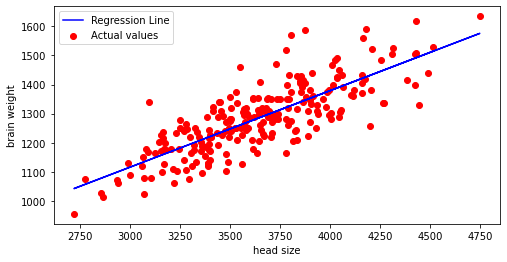

In [37]:
plt.figure(figsize=(8,4))
plt.scatter(df1["Head Size(cm^3)"],df1["Brain Weight(grams)"],c="red",label="Actual values")
plt.plot(df1["Head Size(cm^3)"],pred,c="Blue",label="Regression Line")
plt.xlabel("head size")
plt.ylabel("brain weight")
plt.legend(loc="best")
plt.show()